<h1 align = 'center'>Heart Attack Analysis and Prediction </h1>

##### Import basic libraries

In [895]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading the datasets

In [896]:
df = pd.read_csv("heart.csv")

In [897]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##### Initial analysis on the dataset

In [898]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [899]:
new_columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "Slope", "ca", "thal", "target"]
df.columns = new_columns
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,Slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [900]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (303, 14)


In [901]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  Slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##### Analysis Outputs
* The Data Set consists of 303 Rows and 14 Columns.
* The type of all the variables in the data set are in numerical format. (Integer Or Float)
* According to first impressions, there is no missing value(NaN Value) in the data set.

#### Preparation of Exploratory Data Analysis (EDA)

##### Examining missing values

In [902]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
Slope       0
ca          0
thal        0
target      0
dtype: int64

In [903]:
df.isna().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
rest_ecg    False
thalach     False
exang       False
oldpeak     False
Slope       False
ca          False
thal        False
target      False
dtype: bool

In [904]:
isnull_numbers = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_numbers.append(x)

pd.DataFrame(isnull_numbers, index=df.columns, columns=["Total missing values"])


,Total missing values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

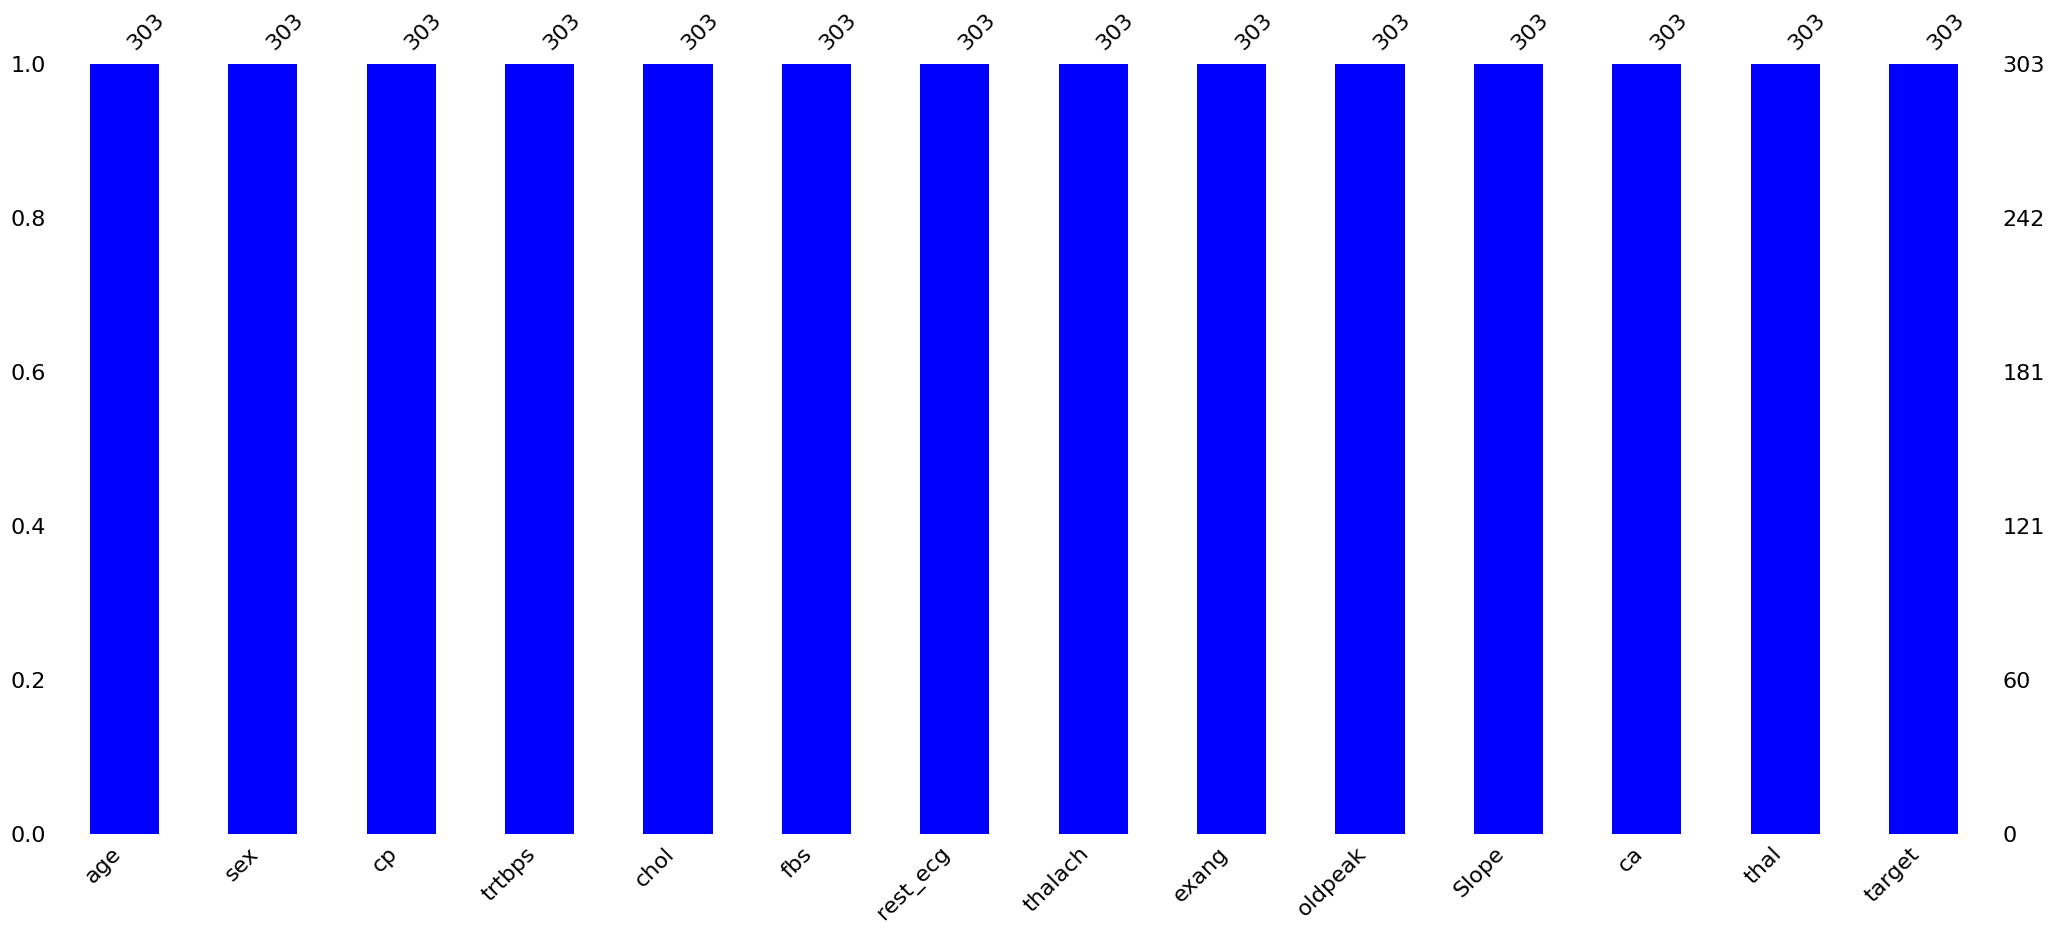

In [905]:
import missingno
missingno.bar(df, color='blue')


##### Examining unique values

In [906]:
df['cp'].nunique()

4

In [907]:
df['cp'].value_counts().count()

4

In [908]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
rest_ecg      3
thalach      91
exang         2
oldpeak      40
Slope         3
ca            5
thal          4
target        2
dtype: int64

In [909]:
unique_numbers = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_numbers.append(x)
pd.DataFrame(unique_numbers, index=df.columns, columns=["Number of unique values"])

,Number of unique values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


##### Seperating Variables

In [910]:
numeric_var = ['age', 'trtbps', 'chol', 'thalach', 'oldpeak']
categoric_var = ['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'Slope', 'ca', 'thal', 'target']

##### Examining statistics of variables

In [911]:
df[numeric_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


<Axes: xlabel='age', ylabel='Density'>

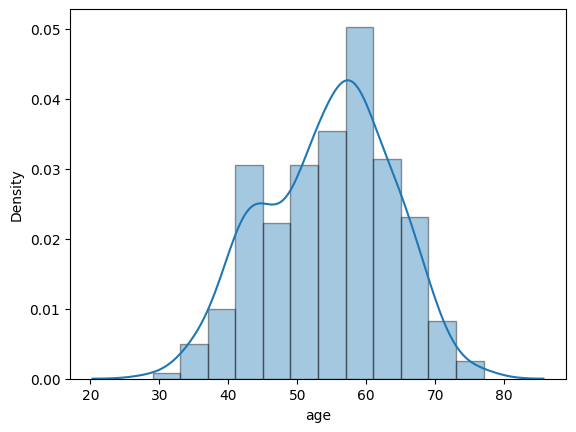

In [912]:
sns.distplot(df['age'], hist_kws=dict(linewidth = 1, edgecolor = 'k') )

<Axes: xlabel='trtbps', ylabel='Density'>

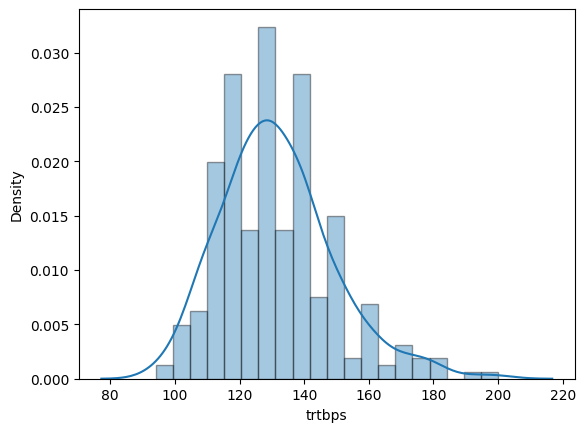

In [913]:
sns.distplot(df['trtbps'], hist_kws=dict(linewidth = 1, edgecolor = 'k'), bins=20 )

<Axes: xlabel='chol', ylabel='Density'>

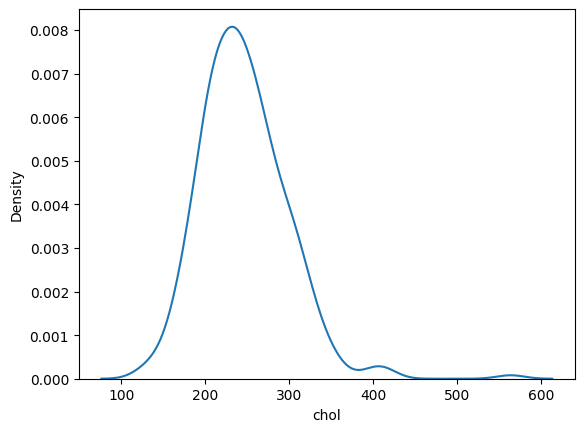

In [914]:
sns.distplot(df['chol'], hist=False)

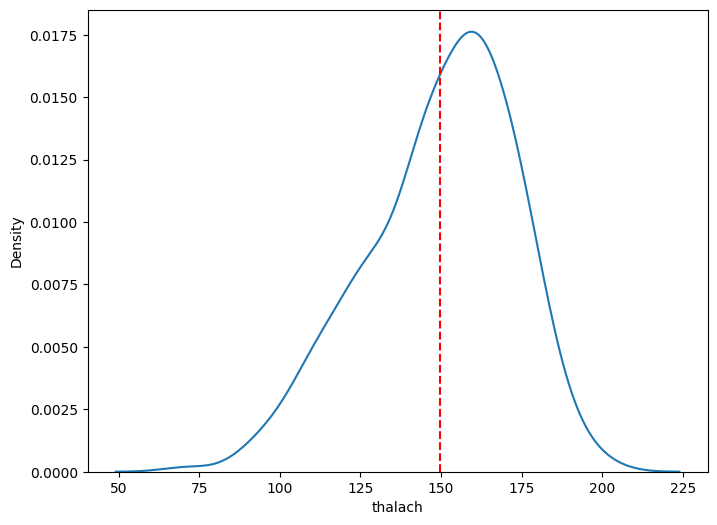

In [915]:
X,y = plt.subplots(figsize = (8,6))
sns.distplot(df['thalach'], hist=False, ax=y)
y.axvline(df['thalach'].mean(), color = "red", ls = '--')

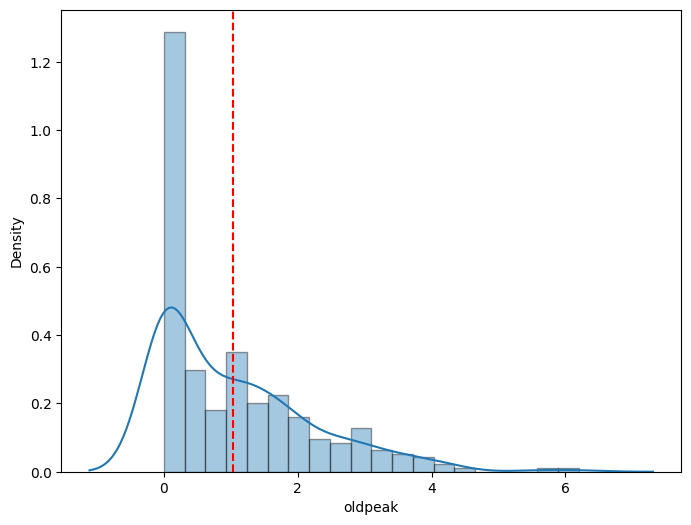

In [916]:
X,y = plt.subplots(figsize = (8,6))
sns.distplot(df['oldpeak'], hist_kws=dict(linewidth = 1, edgecolor = "black"), bins=20)
y.axvline(df['oldpeak'].mean(), color = "red", ls = '--')

#### Exploratory data analysis

##### Numeric variable (Analysis with Distplot) - Univariate Analysis

In [917]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [918]:
numeric_axis_name = ['Age of the Patient', 'Resting Blood Pressure of the Patient', 'Cholesterol', 'MAximum Heart Rate Achieved', 'ST Depression']

In [919]:
list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure of the Patient'),
 ('chol', 'Cholesterol'),
 ('thalach', 'MAximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

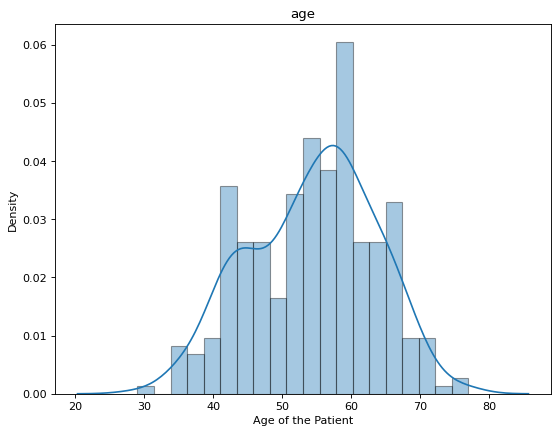

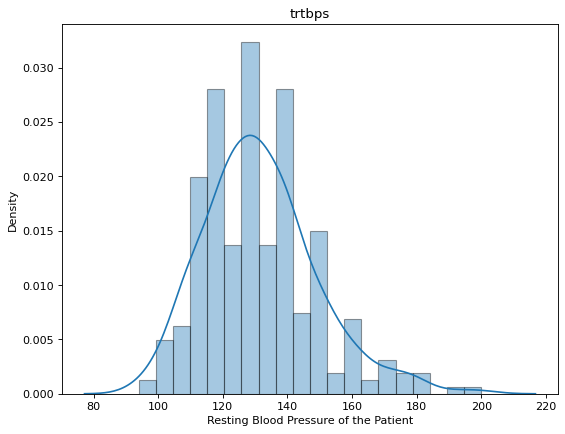

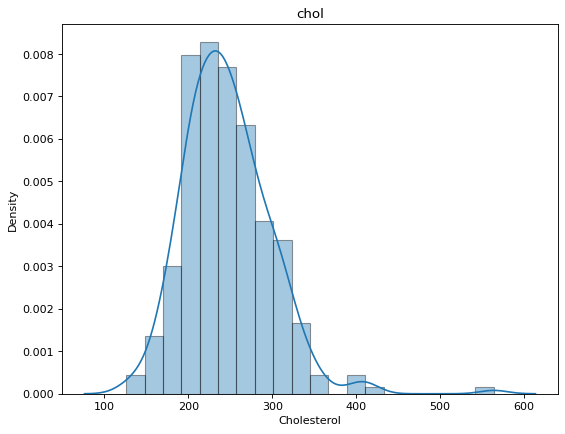

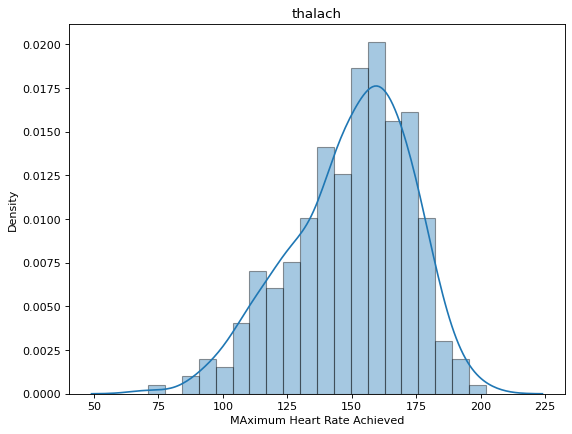

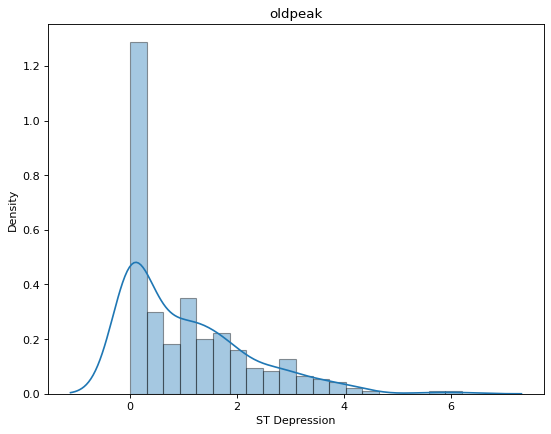

In [920]:
for i,z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize=(8,6), dpi=80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "black"), bins=20)
    plt.title(i)
    plt.xlabel(z)
    plt.ylabel("Density")

    plt.show()

##### Categorical variable (analysis with pie chart) - Univariate Analysis

In [921]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'Slope', 'ca', 'thal', 'target']

In [922]:
categoric_axis_name = ['Gender', 'Chest Pain Type', 'Fasting Blood Sugar', 'Resting Electrocardiographic Results', 
                       'Exercise Induced Angina', 'Slope of ST Segment', 'Number of Major Blood Vessel', 'Thal', 'Target']

In [923]:
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood Sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('Slope', 'Slope of ST Segment'),
 ('ca', 'Number of Major Blood Vessel'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [924]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [925]:
list(df['cp'].value_counts())

[143, 87, 50, 23]

In [926]:
list(df['cp'].value_counts().index)

[0, 2, 1, 3]

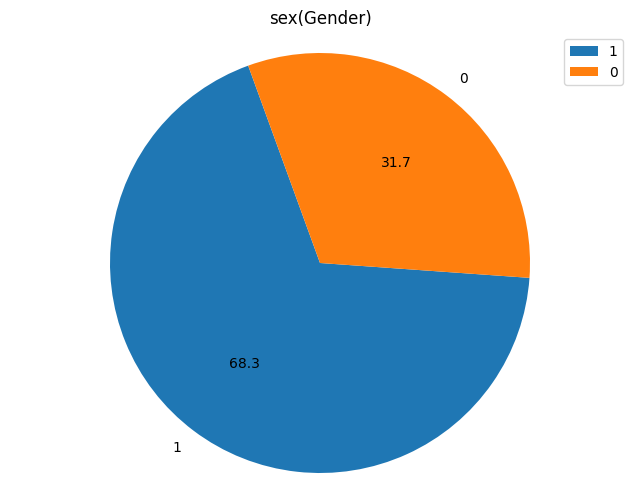

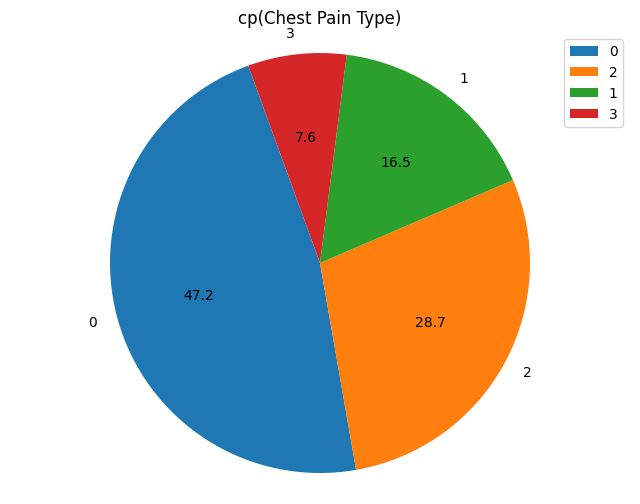

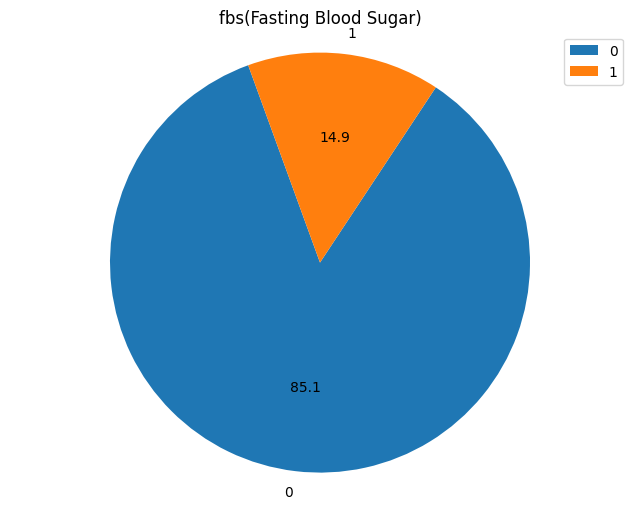

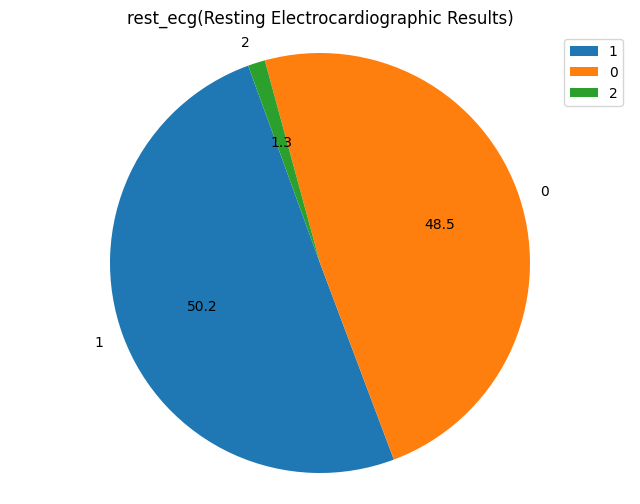

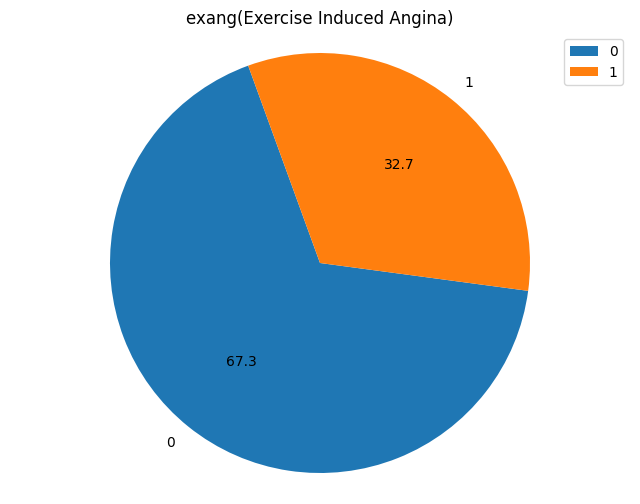

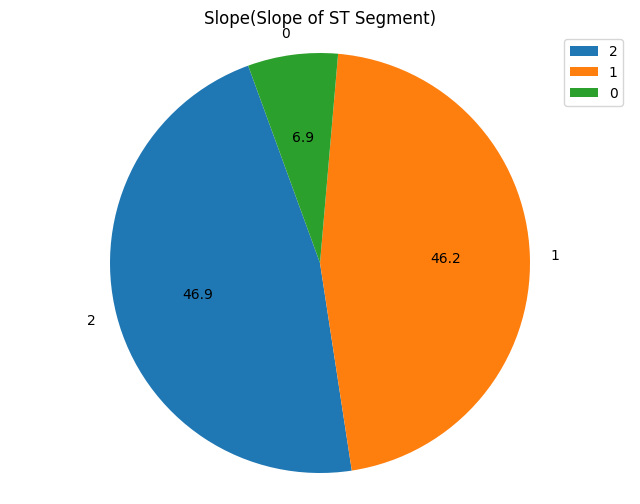

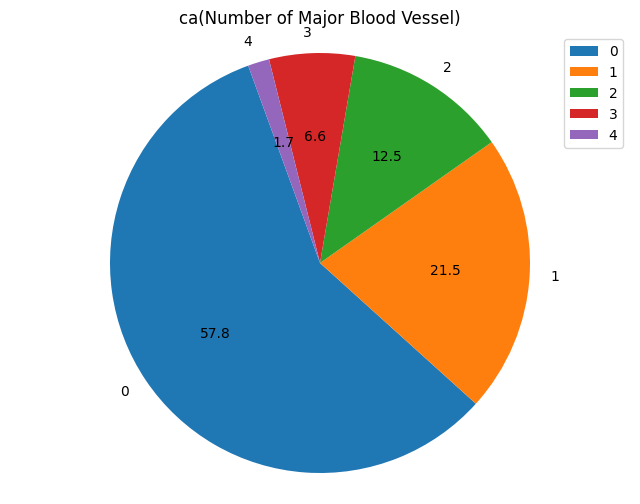

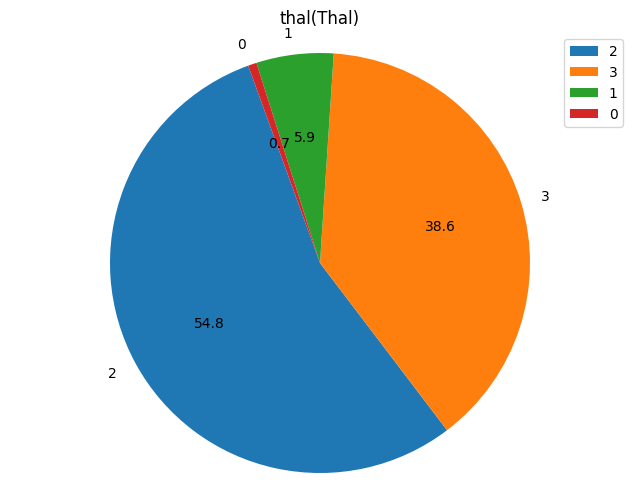

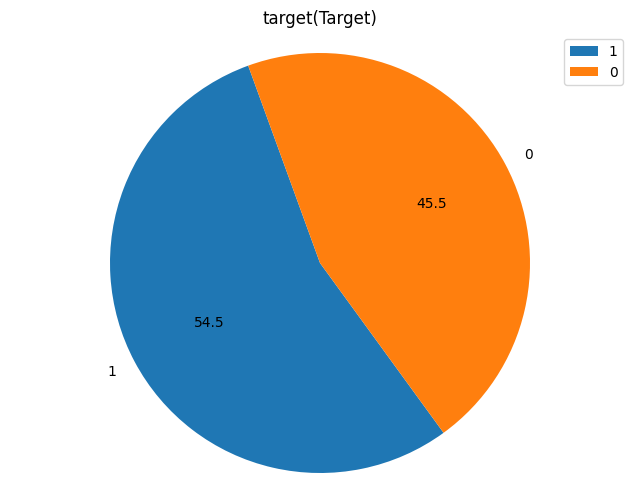

In [927]:
for i,z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize=(8,6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())

    ax.pie(total_observation_values, labels=observation_values, autopct='%1.1f', startangle=110, labeldistance=1.1)
    ax.axis('equal')

    plt.title(i + '(' + z + ')')
    plt.legend()

    plt.show()
    

##### Examining Missing Values

In [928]:
df[df['thal']==0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,Slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [929]:
df['thal'] = df['thal'].replace(0, np.nan)

In [930]:
df.loc[[48,281]]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,Slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [931]:
isnull_numbers = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_numbers.append(x)
pd.DataFrame(isnull_numbers, index=df.columns, columns=['Totla number of missing values'])

,Totla number of missing values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [932]:
df['thal'].fillna(2, inplace=True)

In [933]:
df.loc[[48,281]]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,Slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


In [934]:
df['thal']=pd.to_numeric(df['thal'], downcast='integer')
df['thal']

0      1
1      2
2      2
3      2
4      2
      ..
298    3
299    3
300    3
301    3
302    2
Name: thal, Length: 303, dtype: int8

In [935]:
df.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
rest_ecg    False
thalach     False
exang       False
oldpeak     False
Slope       False
ca          False
thal        False
target      False
dtype: bool

#### Bivariate Analysis

##### Numerical Vairable - Target analysis (analysis with facegrid)

In [936]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [937]:
numeric_var.append("target")

In [938]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

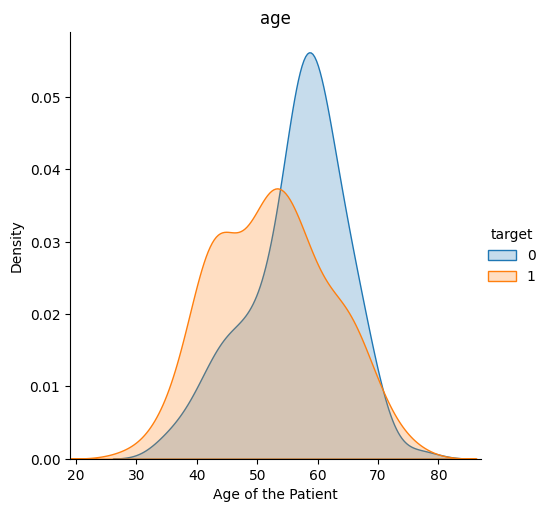

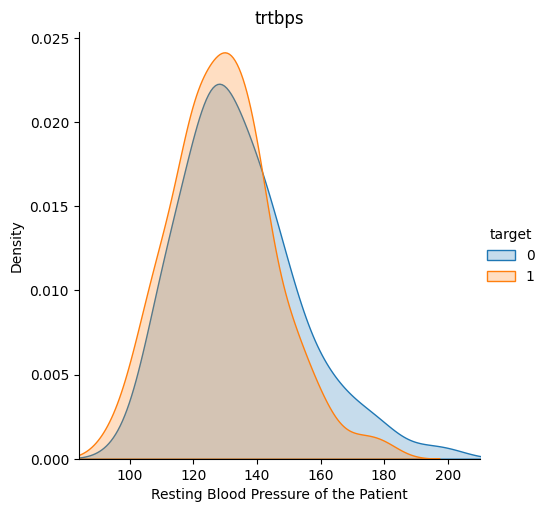

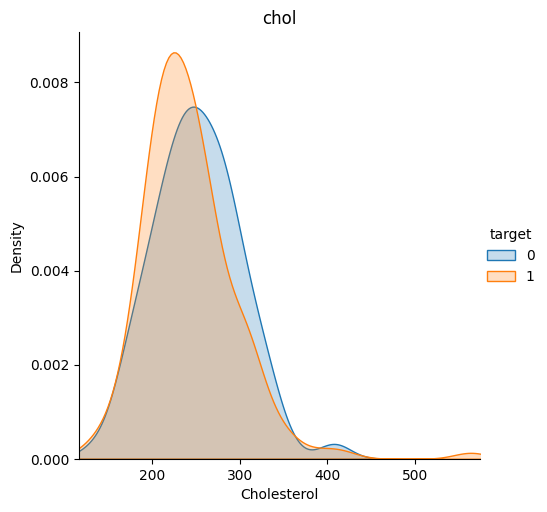

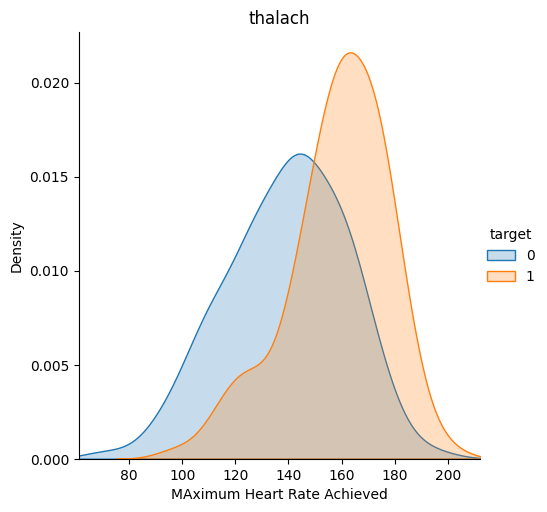

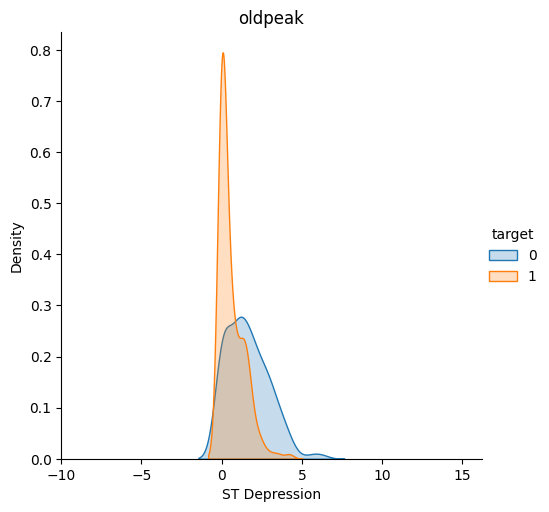

In [939]:
for i,z in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(df[numeric_var], hue='target', height=5, xlim=((df[i].min()-10), (df[i].max()+10)))
    graph.map(sns.kdeplot, i, shade=True)
    graph.add_legend()

    plt.title(i)
    plt.xlabel(z)
    plt.ylabel("Density")

    plt.show()


In [940]:
df[numeric_var].corr().iloc[:, -1]

age       -0.225439
trtbps    -0.144931
chol      -0.085239
thalach    0.421741
oldpeak   -0.430696
target     1.000000
Name: target, dtype: float64

##### Categorical Variables - Target variable(Analysis with countPlot)

In [941]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'Slope', 'ca', 'thal', 'target']

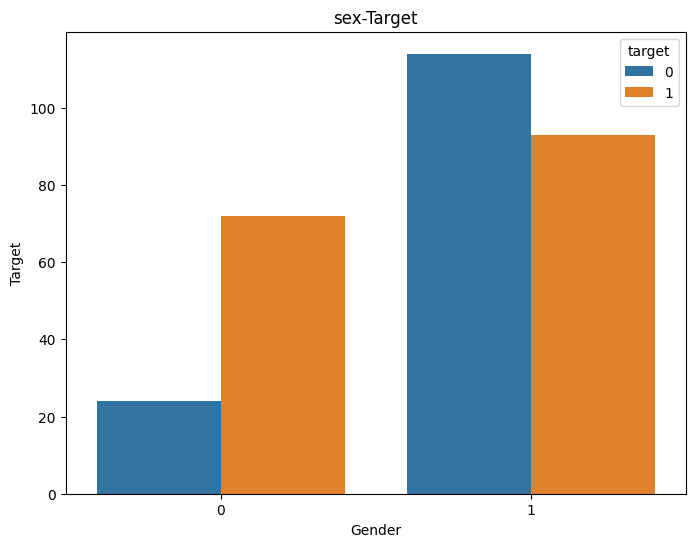

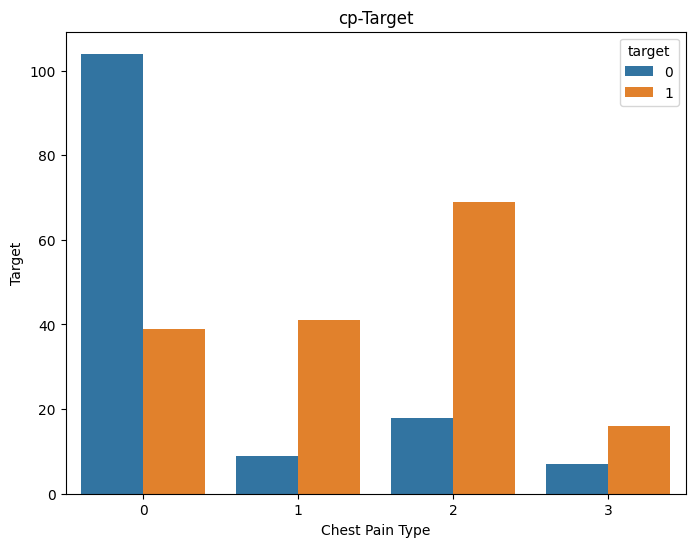

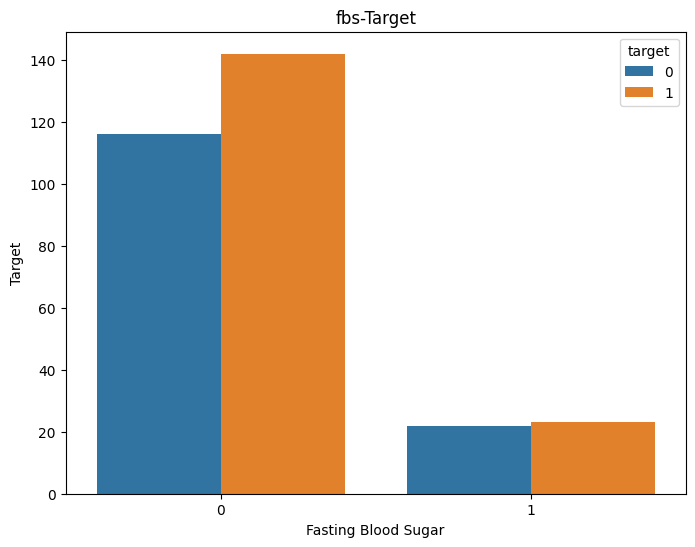

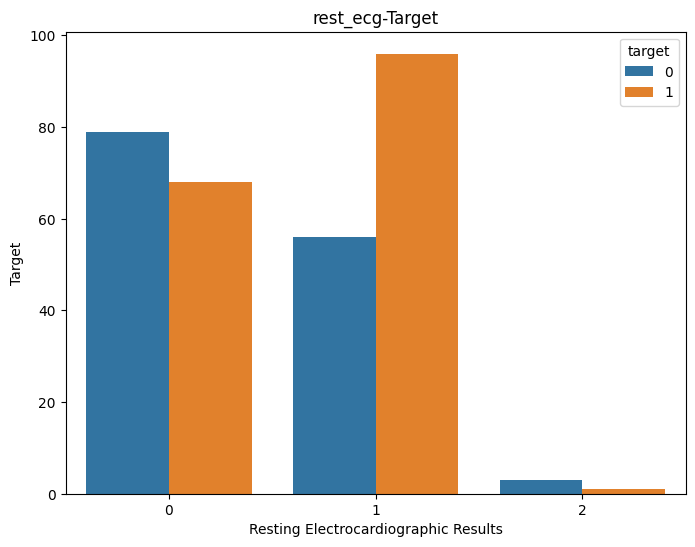

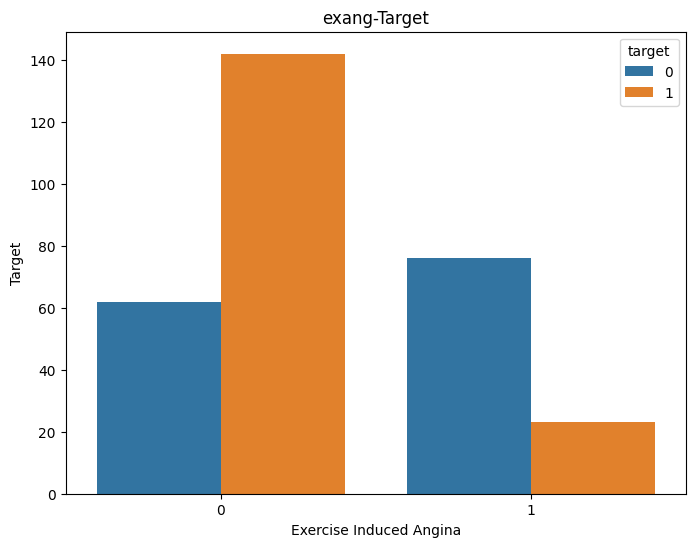

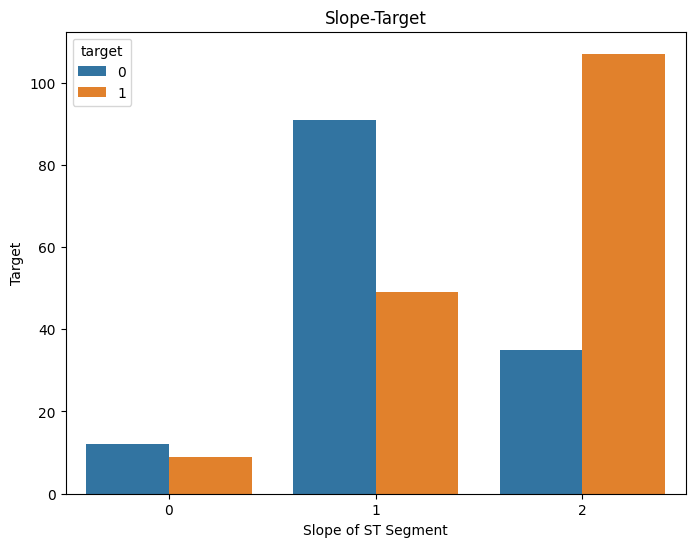

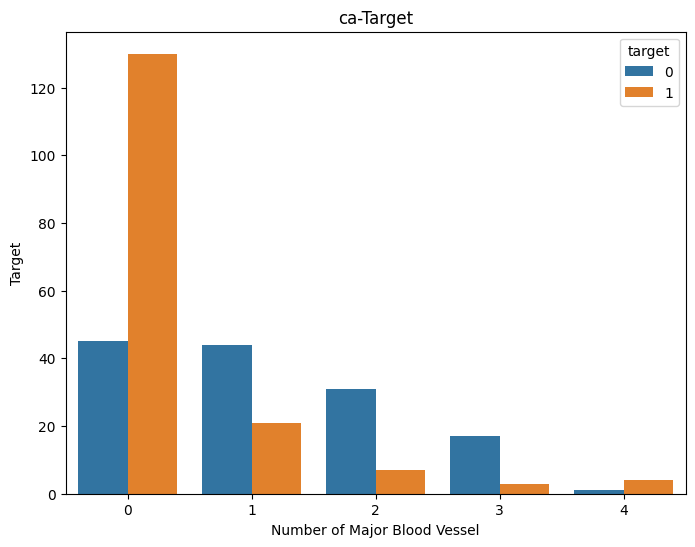

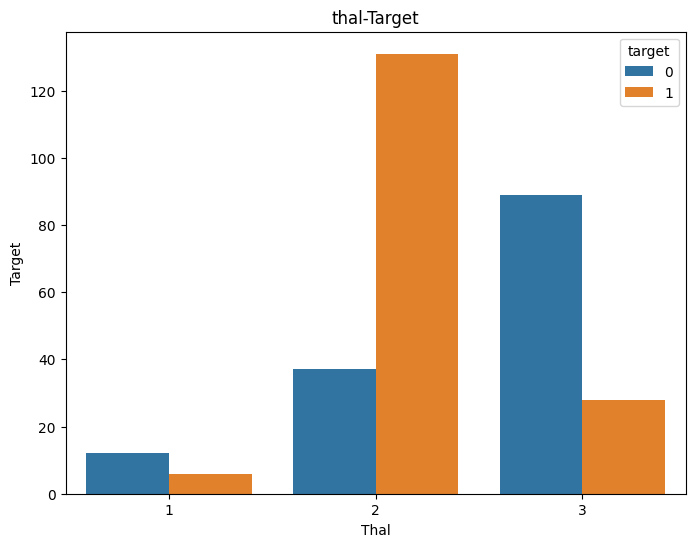

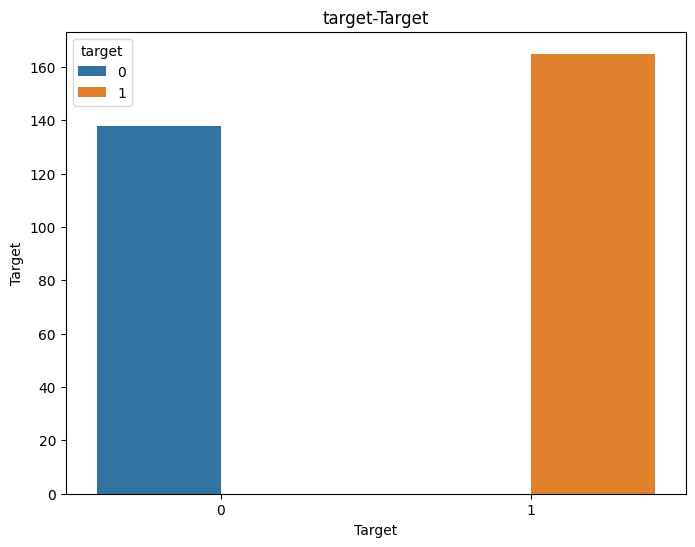

In [942]:
for i,z in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize=(8,6))
    sns.countplot(x=i, data=df[categoric_var], hue="target")

    graph.add_legend()
    plt.title(i + '-' + "Target")
    plt.xlabel(z)
    plt.ylabel("Target")
    plt.show()

In [943]:
df[categoric_var].corr()

,sex,cp,fbs,rest_ecg,exang,Slope,ca,thal,target
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757
Slope,-0.030711,0.119717,-0.059894,0.093045,-0.257748,1.000000,-0.080155,-0.106310,0.345877
ca,0.118261,-0.181053,0.137979,-0.072042,0.115739,-0.080155,1.000000,0.143248,-0.391724
thal,0.211652,-0.169125,-0.011209,-0.013795,0.225508,-0.106310,0.143248,1.000000,-0.363322
target,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.363322,1.000000


In [944]:
df[categoric_var].corr().iloc[:, -1]

sex        -0.280937
cp          0.433798
fbs        -0.028046
rest_ecg    0.137230
exang      -0.436757
Slope       0.345877
ca         -0.391724
thal       -0.363322
target      1.000000
Name: target, dtype: float64

#### Examining numerical variable with pairplot

In [945]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [946]:
numeric_var.remove("target")

In [947]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [948]:
df[numeric_var].head()

,age,trtbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


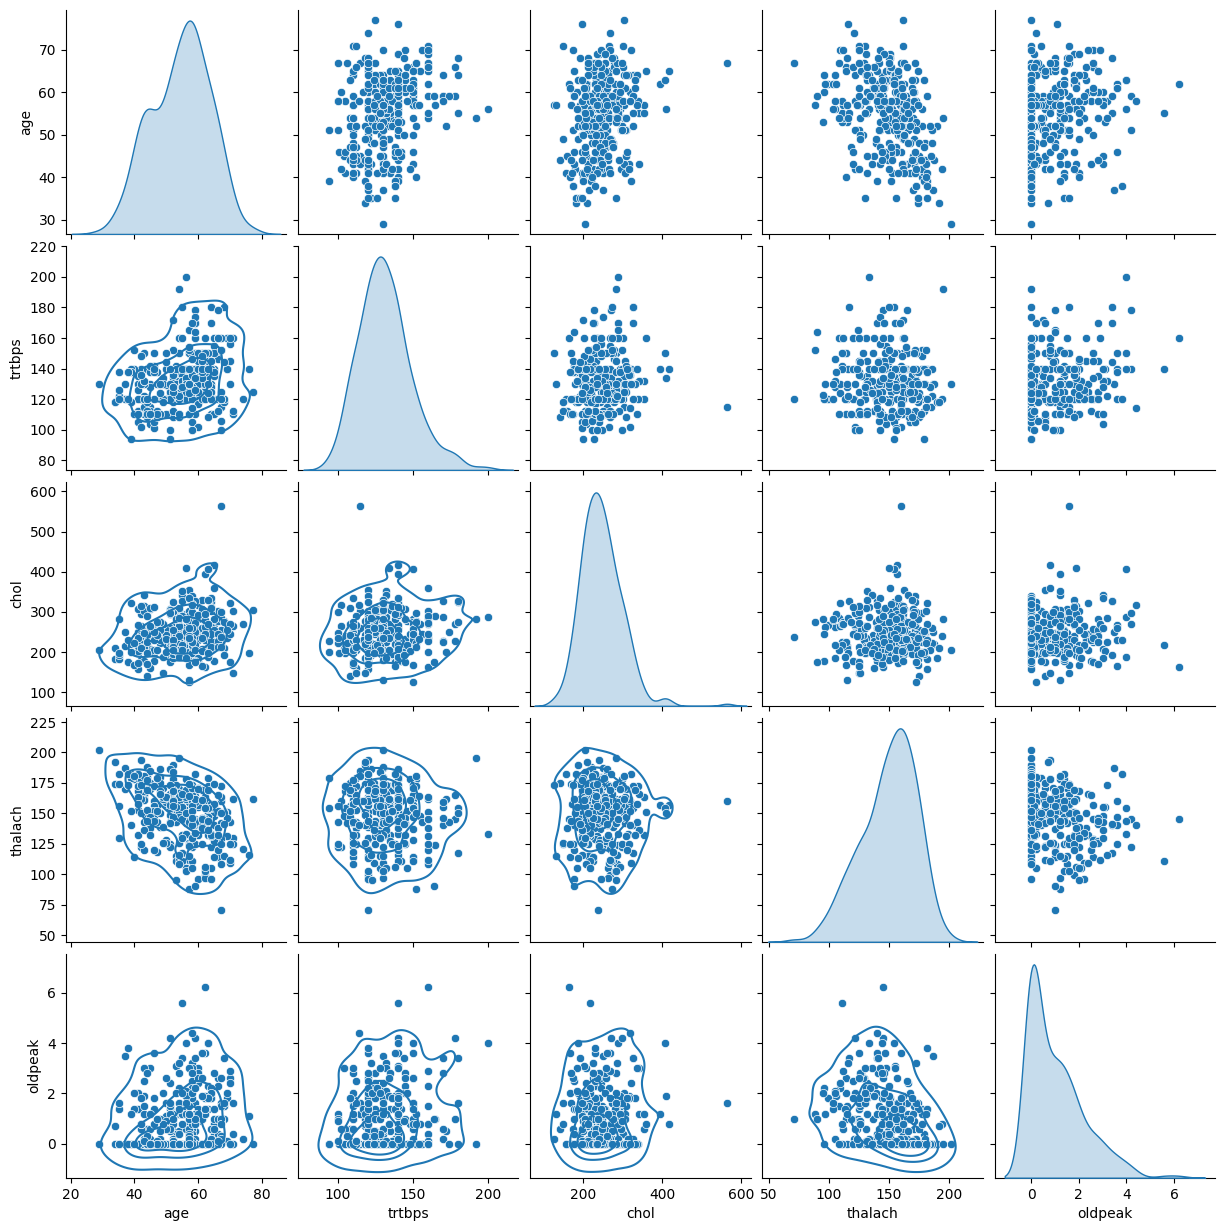

In [949]:
graph = sns.pairplot(df[numeric_var], diag_kind="kde")
graph.map_lower(sns.kdeplot, levels=4)
plt.show()

##### Feature scaling with RobustScaler Method

In [950]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
scaled_Data = robust_scaler.fit_transform(df[numeric_var])

In [951]:
scaled_Data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [952]:
type(scaled_Data)

numpy.ndarray

In [953]:
df_scaled = pd.DataFrame(scaled_Data, columns=numeric_var)

In [954]:
df_scaled

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250
...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750
299,-0.740741,-1.00,0.377953,-0.646154,0.2500
300,0.962963,0.70,-0.740157,-0.369231,1.6250
301,0.148148,0.00,-1.716535,-1.169231,0.2500


##### Creating new dataframe with melt() function

In [955]:
df_new = pd.concat([df_scaled, df.loc[:, "target"]], axis=1)

In [956]:
df_new.head(10)

,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1
5,0.148148,0.50,-0.755906,-0.153846,-0.2500,1
6,0.074074,0.50,0.850394,0.000000,0.3125,1
7,-0.814815,-0.50,0.362205,0.615385,-0.5000,1
8,-0.222222,2.10,-0.645669,0.276923,-0.1875,1
9,0.148148,1.00,-1.133858,0.646154,0.5000,1


In [957]:
melted_data = pd.melt(df_new, id_vars="target", var_name="variables", value_name="value")

In [958]:
melted_data.head()

,target,variables,value
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148


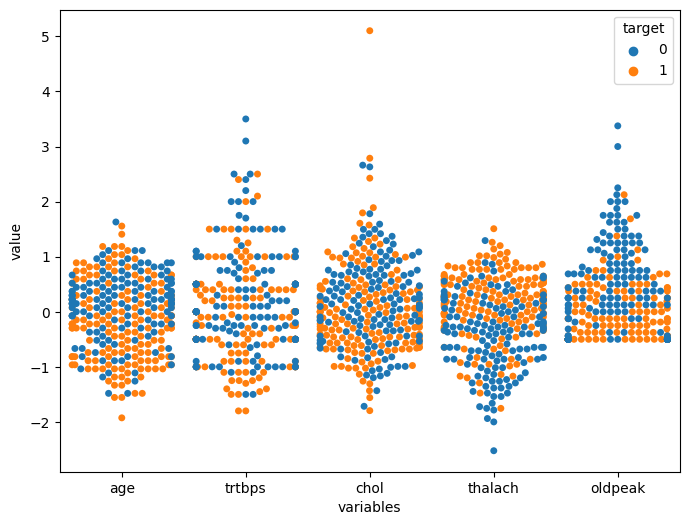

In [959]:
plt.figure(figsize=(8,6))
sns.swarmplot(x='variables', y='value', hue='target', data=melted_data)
plt.show()

##### Numerical variables - categorical variables (Analysis with SwarmPlot)

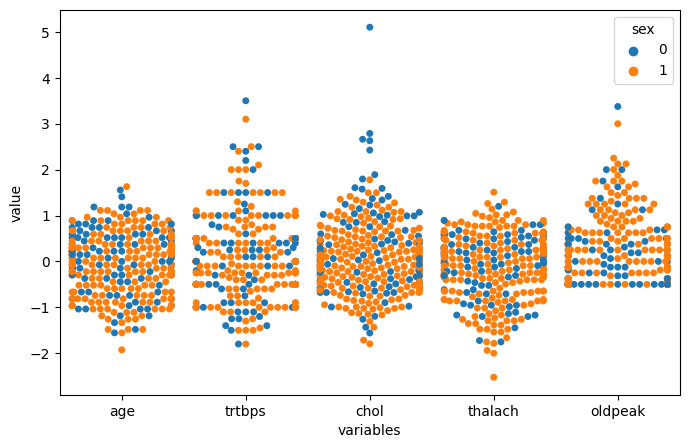

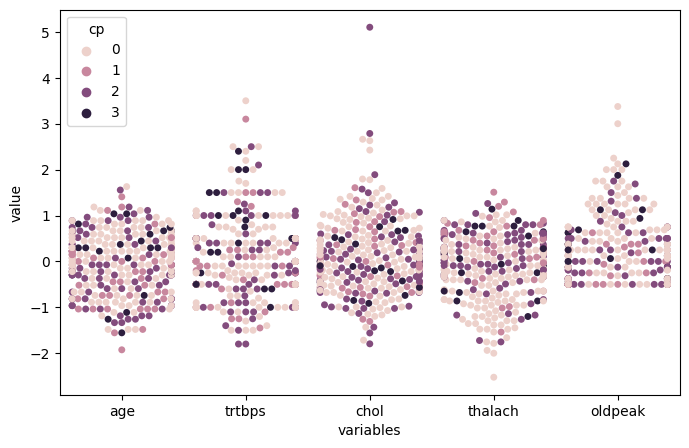

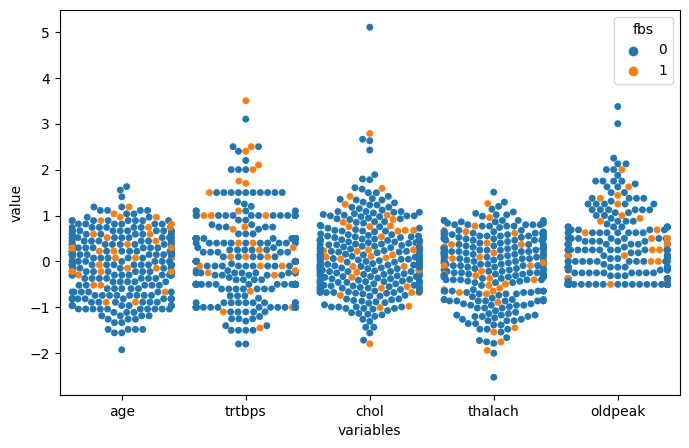

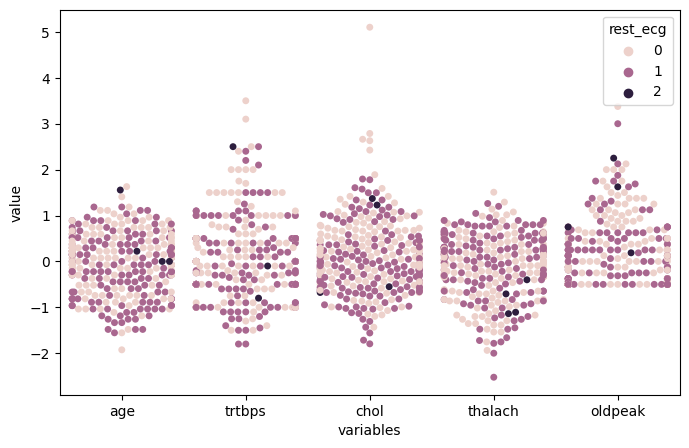

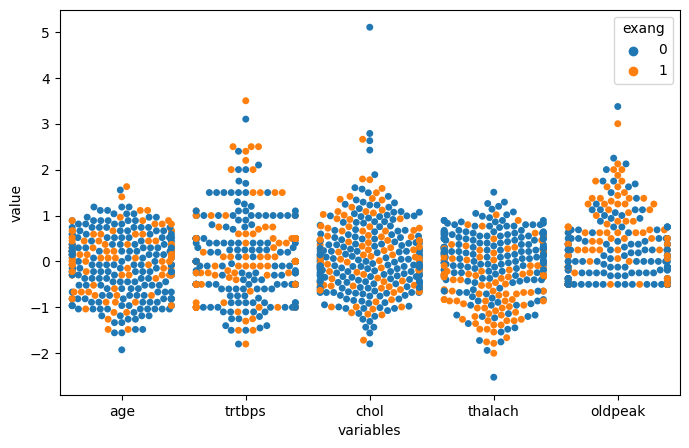

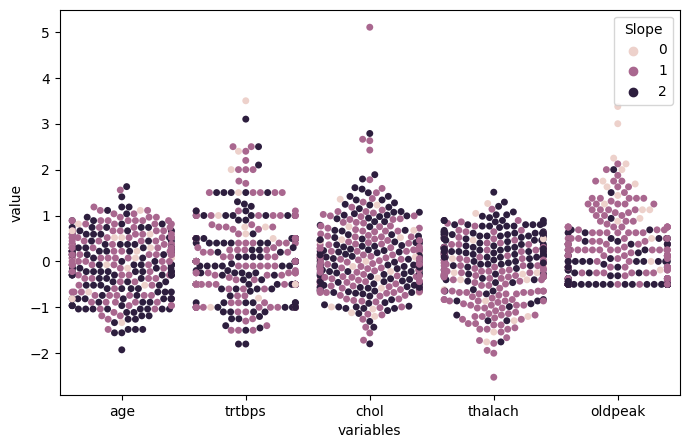

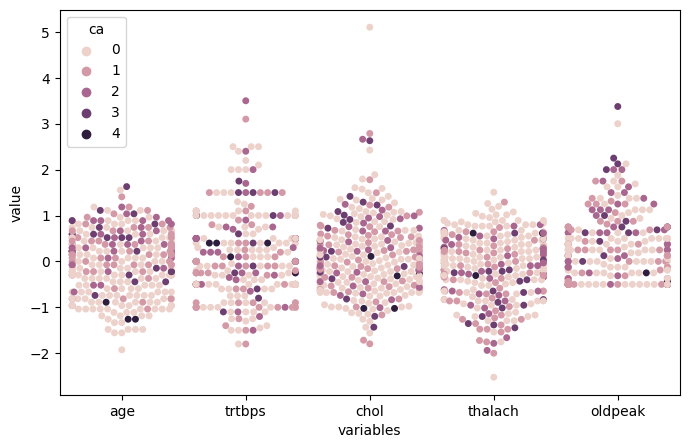

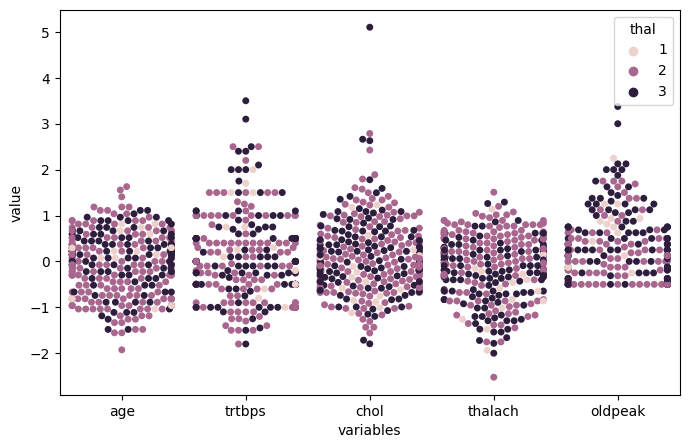

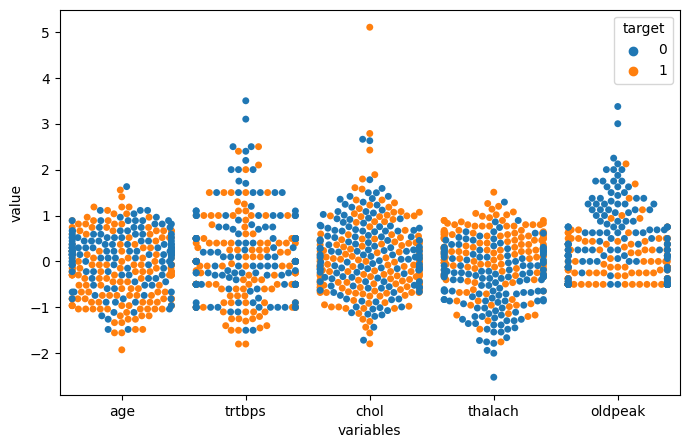

In [960]:
for i in df[categoric_var]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis=1)
    melted_data = pd.melt(df_new, id_vars=i, var_name="variables", value_name="value")
    plt.figure(figsize=(8,5))
    sns.swarmplot(x="variables", y="value", hue=i, data=melted_data)
    plt.show()

##### Numerical variables - categorical variables (Analysis with BoxPlot)

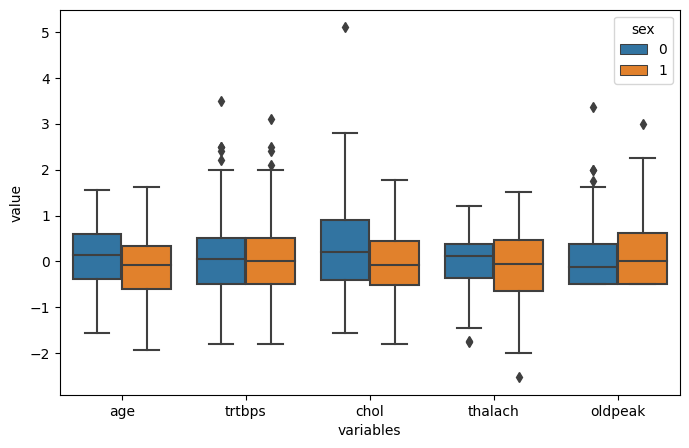

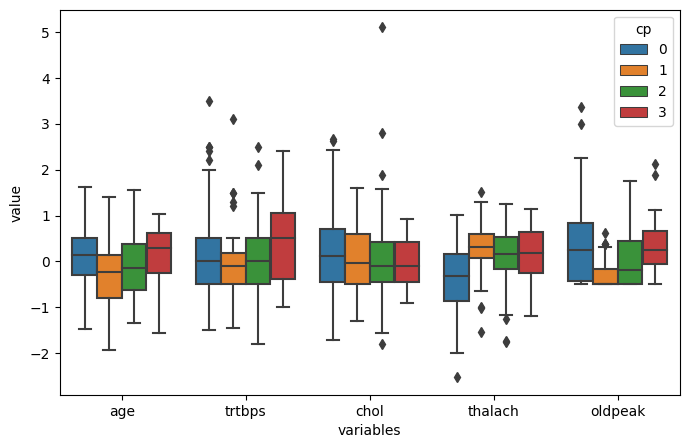

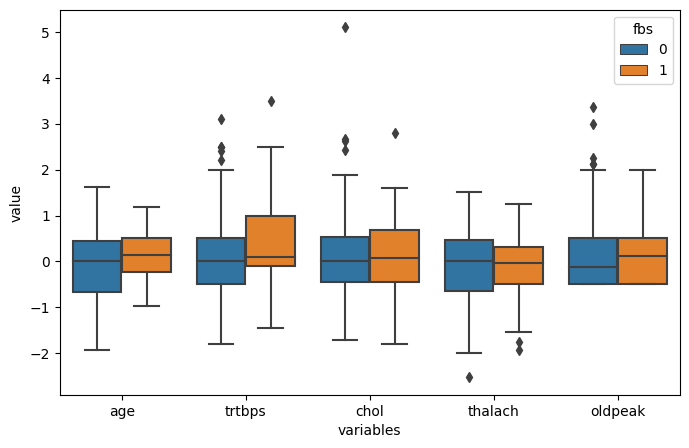

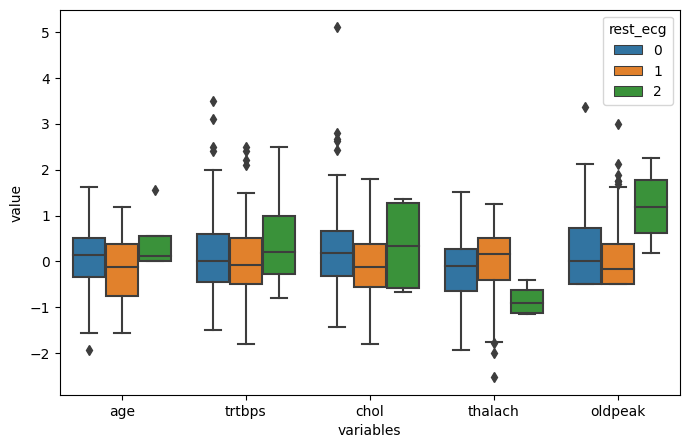

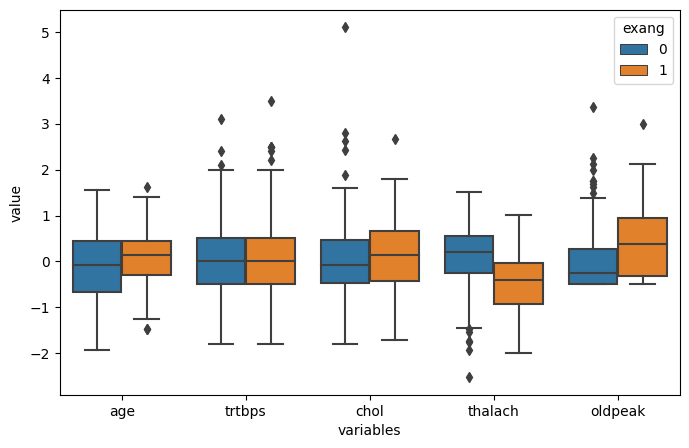

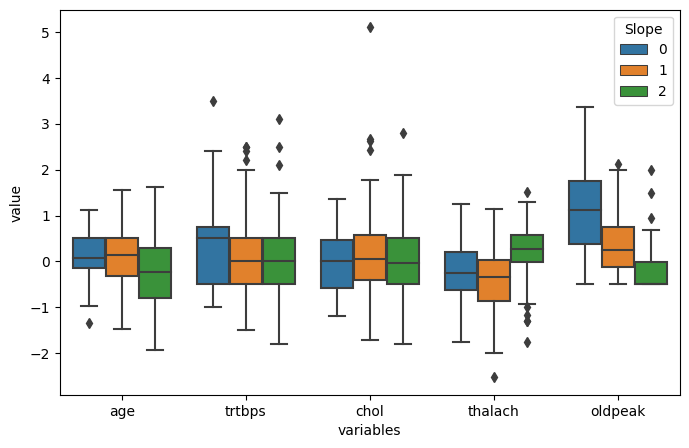

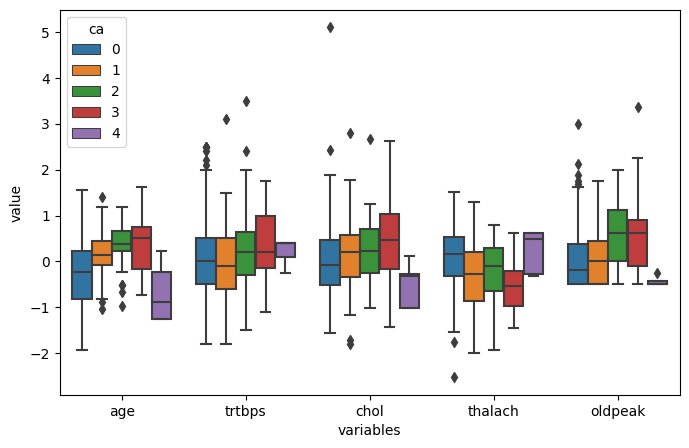

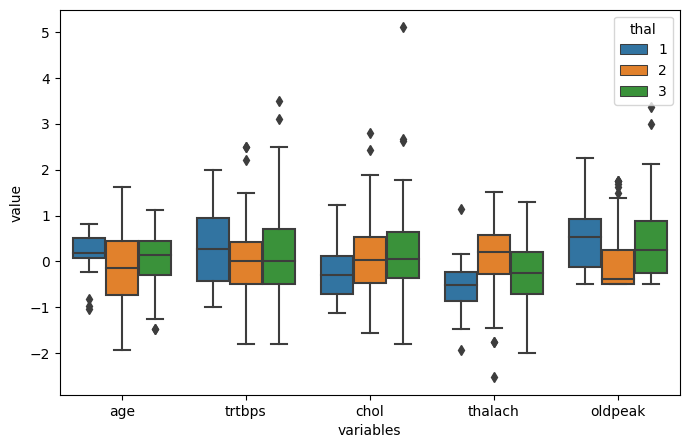

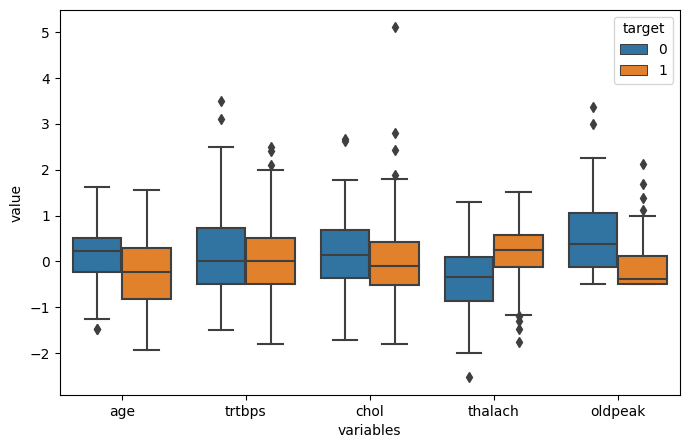

In [961]:
for i in df[categoric_var]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis=1)
    melted_data = pd.melt(df_new, id_vars=i, var_name="variables", value_name="value")
    plt.figure(figsize=(8,5))
    sns.boxplot(x="variables", y="value", hue=i, data=melted_data)
    plt.show()
    

##### Numerical variables - categorical variables (Analysis with Heatmap)

In [962]:
df_scaled

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250
...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750
299,-0.740741,-1.00,0.377953,-0.646154,0.2500
300,0.962963,0.70,-0.740157,-0.369231,1.6250
301,0.148148,0.00,-1.716535,-1.169231,0.2500


In [963]:
df_new_2 = pd.concat([df_scaled, df[categoric_var]], axis=1)
df_new_2

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,Slope,ca,thal,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,0,1,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,0,2,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,2,0,2,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,2,0,2,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0,0,0,1,1,1,0,3,0
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,1,3,0,1,0,1,0,3,0
300,0.962963,0.70,-0.740157,-0.369231,1.6250,1,0,1,1,0,1,2,3,0
301,0.148148,0.00,-1.716535,-1.169231,0.2500,1,0,0,1,1,1,1,3,0


In [964]:
df_new_2.corr()

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,Slope,ca,thal,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.098447,-0.068653,0.121308,-0.116211,0.096801,-0.168814,0.276326,0.066745,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.056769,0.047608,0.177531,-0.114103,0.067616,-0.121475,0.101389,0.060638,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.197912,-0.076904,0.013294,-0.151040,0.067023,-0.004038,0.070511,0.087866,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.044020,0.295762,-0.008567,0.044123,-0.378812,0.386784,-0.213177,-0.115310,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.096093,-0.149230,0.005747,-0.058770,0.288223,-0.577537,0.222682,0.210236,-0.430696
sex,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.068653,0.047608,-0.076904,0.295762,-0.149230,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.121308,0.177531,0.013294,-0.008567,0.005747,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.116211,-0.114103,-0.151040,0.044123,-0.058770,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.096801,0.067616,0.067023,-0.378812,0.288223,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757


<Axes: >

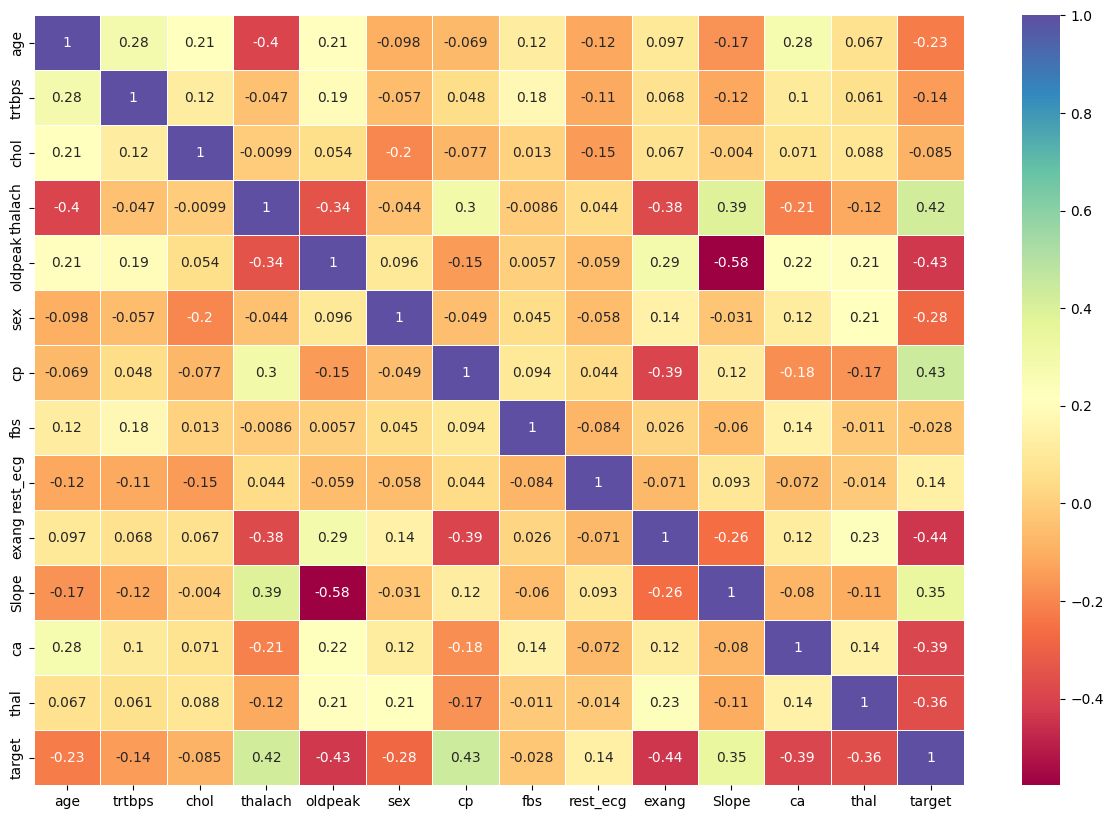

In [965]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new_2.corr(), cmap="Spectral", annot=True, linewidths=0.5)

#### Preparation for Modelling

#### Dropping columns with low correlation

In [966]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,Slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [967]:
df.drop(['chol', 'fbs', 'rest_ecg'], axis=1, inplace=True)

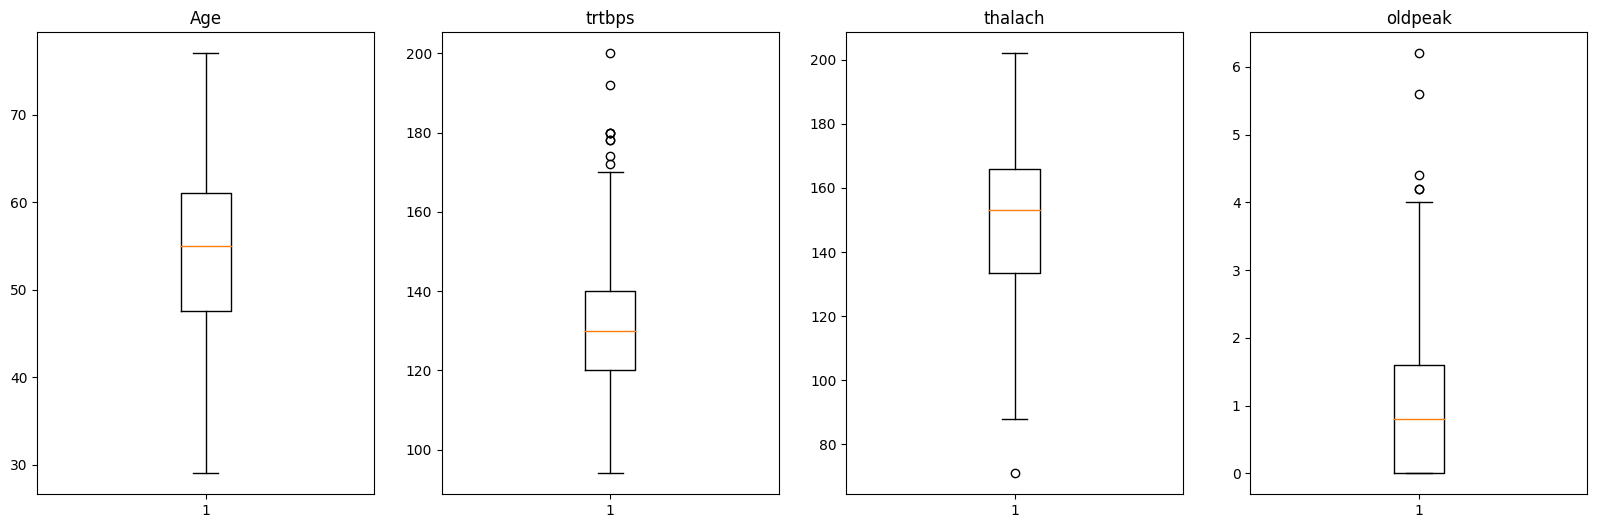

In [968]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,6))

ax1.boxplot(df['age'])
ax1.set_title("Age")

ax2.boxplot(df['trtbps'])
ax2.set_title("trtbps")

ax3.boxplot(df['thalach'])
ax3.set_title("thalach")

ax4.boxplot(df['oldpeak'])
ax4.set_title("oldpeak")

plt.show()

##### Dealing with outliers

##### Trtbps Variable - Winsorize method

In [969]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [970]:
z_score_trtbps = zscore(df["trtbps"])
for threshold in range(1,4):
    print(f"Threshold value is: {threshold}")
    print(f"Number of outliers:{len(np.where(z_score_trtbps>threshold)[0])}")
    print("-----------------------")

Threshold value is: 1
Number of outliers:51
-----------------------
Threshold value is: 2
Number of outliers:13
-----------------------
Threshold value is: 3
Number of outliers:2
-----------------------


In [971]:
df[z_score_trtbps>2][["trtbps"]]

,trtbps
8,172
101,178
110,180
152,170
195,170
203,180
223,200
228,170
241,174
248,192


In [972]:
#find minimum value
df[z_score_trtbps>2].trtbps.min()

170

In [973]:
df[df["trtbps"]<170].trtbps.max()

165

In [974]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"], 165))/100
print(winsorize_percentile_trtbps)

0.957095709570957


In [975]:
1-winsorize_percentile_trtbps

0.04290429042904298

In [976]:
trtbps_winsorize = winsorize(df.trtbps, (0, 1-winsorize_percentile_trtbps))

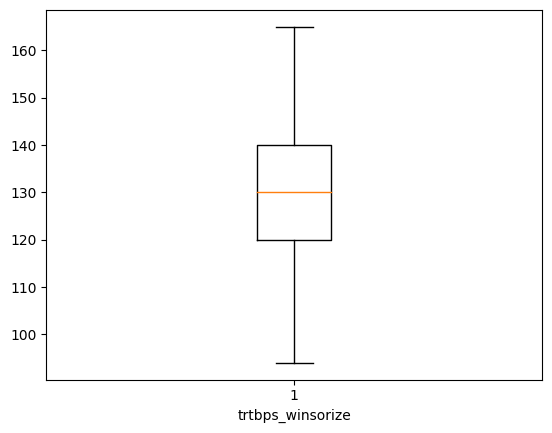

In [977]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize")
plt.show()

In [978]:
df['trtbps_winsorize'] = trtbps_winsorize

In [979]:
df.drop(columns=['trtbps'], axis=1, inplace=True)
df.head()

,age,sex,cp,thalach,exang,oldpeak,Slope,ca,thal,target,trtbps_winsorize
0,63,1,3,150,0,2.3,0,0,1,1,145
1,37,1,2,187,0,3.5,0,0,2,1,130
2,41,0,1,172,0,1.4,2,0,2,1,130
3,56,1,1,178,0,0.8,2,0,2,1,120
4,57,0,0,163,1,0.6,2,0,2,1,120


##### Thalach Variable - interquantile method

In [980]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3-q1
    lower_v = q1-(1.5*diff)
    upper_v = q3+(1.5*diff)
    return df[(df[var]<lower_v) | (df[var]>upper_v)]

In [981]:
thalach_out = iqr(df, "thalach")
thalach_out

,age,sex,cp,thalach,exang,oldpeak,Slope,ca,thal,target,trtbps_winsorize
272,67,1,0,71,0,1.0,1,0,2,0,120


In [982]:
df.drop([272], axis=0, inplace=True)

In [983]:
df["thalach"].iloc[270:275]

270    144
271    145
273    156
274    118
275    168
Name: thalach, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x268e5c49f00>,
 'caps': [<matplotlib.lines.Line2D at 0x268e5c48490>,
 'boxes': [<matplotlib.lines.Line2D at 0x268e5c4b520>],
 'medians': [<matplotlib.lines.Line2D at 0x268e5c4bca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x268e5c481f0>],
 'means': []}

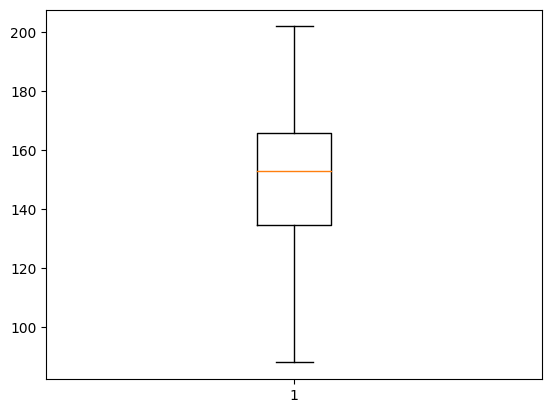

In [984]:
plt.boxplot(df["thalach"])

##### Oldpeak Variable

In [985]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3-q1
    lower_v = q1-(1.5*diff)
    upper_v = q3+(1.5*diff)
    return df[(df[var]<lower_v) | (df[var]>upper_v)]

In [986]:
iqr(df, "oldpeak")

,age,sex,cp,thalach,exang,oldpeak,Slope,ca,thal,target,trtbps_winsorize
101,59,1,3,145,0,4.2,0,0,3,1,165
204,62,0,0,145,0,6.2,0,3,3,0,160
221,55,1,0,111,1,5.6,0,0,3,0,140
250,51,1,0,122,1,4.2,1,3,3,0,140
291,58,1,0,140,0,4.4,0,3,1,0,114


In [987]:
df[df["oldpeak"]<4.2].oldpeak.max()

4.0

In [988]:
winsorize_percentile_oldpeak = stats.percentileofscore(df["oldpeak"], 4)/100
winsorize_percentile_oldpeak


0.980132450331126

In [989]:
1-winsorize_percentile_oldpeak

0.01986754966887405

In [990]:
oldpeak_winsorize = winsorize(df["oldpeak"], (0, (1-winsorize_percentile_oldpeak)))

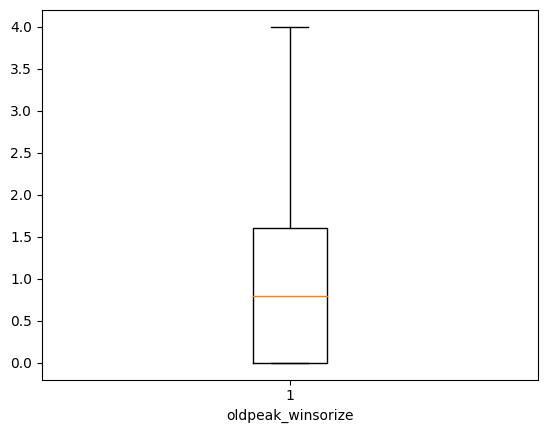

In [991]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize")
plt.show()

In [992]:
df["oldpeak_winsorize"] = oldpeak_winsorize

In [993]:
df.head()

,age,sex,cp,thalach,exang,oldpeak,Slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,2.3,0,0,1,1,145,2.3
1,37,1,2,187,0,3.5,0,0,2,1,130,3.5
2,41,0,1,172,0,1.4,2,0,2,1,130,1.4
3,56,1,1,178,0,0.8,2,0,2,1,120,0.8
4,57,0,0,163,1,0.6,2,0,2,1,120,0.6


In [994]:
df.drop(columns=["oldpeak"], axis=1, inplace=True)
df.head()

,age,sex,cp,thalach,exang,Slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


#### Determining distributions of numerical variables

Text(0.5, 1.0, 'oldpeak_winsorize')

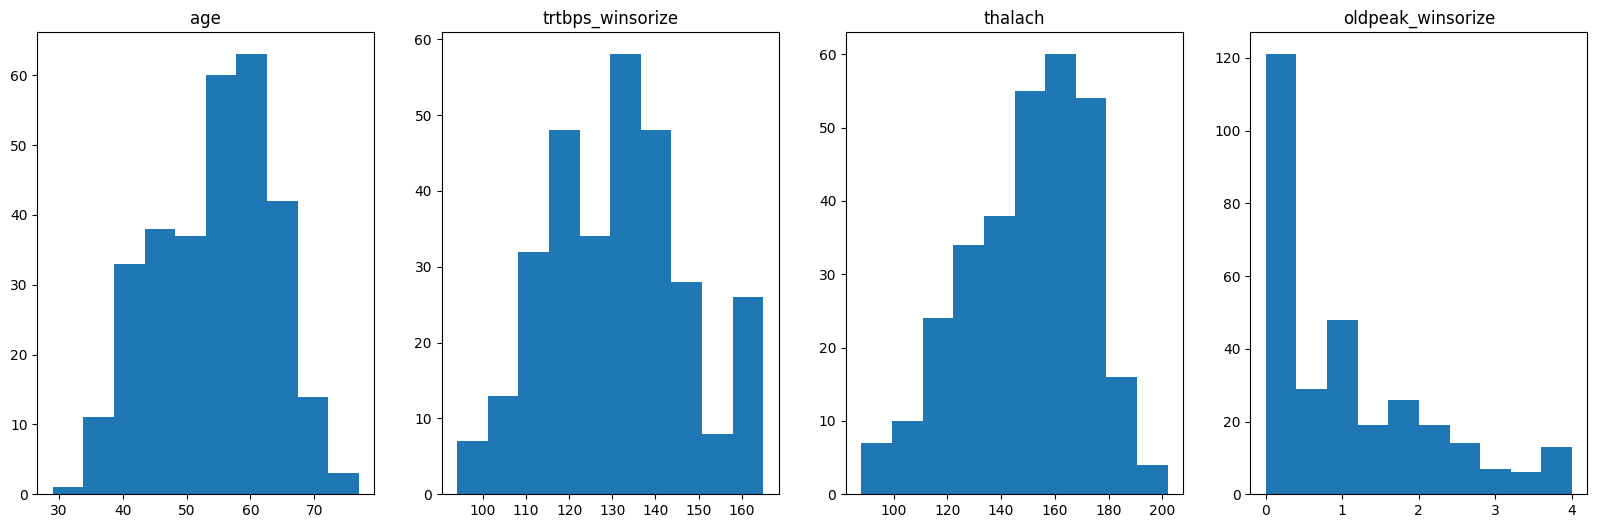

In [995]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,6))

ax1.hist(df["age"]) 
ax1.set_title("age")

ax2.hist(df['trtbps_winsorize'])
ax2.set_title("trtbps_winsorize")

ax3.hist(df["thalach"])
ax3.set_title("thalach")

ax4.hist(df['oldpeak_winsorize'])
ax4.set_title("oldpeak_winsorize")

In [996]:
df[["age", 'trtbps_winsorize', 'thalach', 'oldpeak_winsorize']].agg(['skew']).transpose()

,skew
age,-0.199209
trtbps_winsorize,0.251969
thalach,-0.461611
oldpeak_winsorize,0.996036


###### if the skewness is in between -0.5 and +0.5 that means variable is symmetrical, but as we see 'oldpeak_winsorize' is highly skewed

##### Transformation operation on unsymmetrical data

In [997]:
df["oldpeak_winsorize_log"] = np.log(df["oldpeak_winsorize"])
df["oldpeak_winsorize_sqrt"] = np.sqrt(df["oldpeak_winsorize"])
df.head()

,age,sex,cp,thalach,exang,Slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize,oldpeak_winsorize_log,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,2.3,0.832909,1.516575
1,37,1,2,187,0,0,0,2,1,130,3.5,1.252763,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.4,0.336472,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.8,-0.223144,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.6,-0.510826,0.774597


In [998]:
df[['oldpeak_winsorize', "oldpeak_winsorize_log", "oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()

,skew
oldpeak_winsorize,0.996036
oldpeak_winsorize_log,NaN
oldpeak_winsorize_sqrt,0.108926


In [999]:
df.drop(["oldpeak_winsorize", "oldpeak_winsorize_log"], axis=1, inplace=True)
df.head()

,age,sex,cp,thalach,exang,Slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


##### Applying one hot encoding to categorical variables

In [1000]:
df_copy = df.copy()

In [1001]:
df_copy.head()

,age,sex,cp,thalach,exang,Slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


In [1002]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'Slope', 'ca', 'thal', 'target']

In [1003]:
categoric_var.remove("fbs")
categoric_var.remove("rest_ecg")
categoric_var

['sex', 'cp', 'exang', 'Slope', 'ca', 'thal', 'target']

In [1004]:
df_copy = pd.get_dummies(df_copy, columns=categoric_var[:-1], drop_first=True)

In [1005]:
df_copy

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,Slope_1,Slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,63,150,1,145,1.516575,1,0,0,1,0,0,0,0,0,0,0,0,0
1,37,187,1,130,1.870829,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,172,1,130,1.183216,0,1,0,0,0,0,1,0,0,0,0,1,0
3,56,178,1,120,0.894427,1,1,0,0,0,0,1,0,0,0,0,1,0
4,57,163,1,120,0.774597,0,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,123,0,140,0.447214,0,0,0,0,1,1,0,0,0,0,0,0,1
299,45,132,0,110,1.095445,1,0,0,1,0,1,0,0,0,0,0,0,1
300,68,141,0,144,1.843909,1,0,0,0,0,1,0,0,1,0,0,0,1
301,57,115,0,130,1.095445,1,0,0,0,1,1,0,1,0,0,0,0,1


##### Feature scaling using Robust Scaler Method

In [1006]:
new_numeric_var = ['age', 'thalach', 'trtbps_winsorize', 'oldpeak_winsorize_sqrt']

In [1007]:
robust_scaler = RobustScaler()
df_copy[new_numeric_var] = robust_scaler.fit_transform(df_copy[new_numeric_var])
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,Slope_1,Slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,0.581818,-0.095238,1,0.75,0.491851,1,0,0,1,0,0,0,0,0,0,0,0,0
1,-1.309091,1.079365,1,0.00,0.771913,1,0,1,0,0,0,0,0,0,0,0,1,0
2,-1.018182,0.603175,1,0.00,0.228308,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0.072727,0.793651,1,-0.50,0.000000,1,1,0,0,0,0,1,0,0,0,0,1,0
4,0.145455,0.317460,1,-0.50,-0.094734,0,0,0,0,1,0,1,0,0,0,0,1,0


##### Seperating data into test and train data

In [1008]:
from sklearn.model_selection import train_test_split

In [1009]:
X = df_copy.drop(["target"], axis=1)
y = df_copy[["target"]]

In [1010]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

In [1011]:
X_train.head()

,age,thalach,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,Slope_1,Slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
201,0.363636,-0.380952,-0.25,0.615769,1,0,0,0,1,1,0,1,0,0,0,0,1
82,0.363636,0.222222,-1.40,-0.707107,0,0,1,0,0,0,1,1,0,0,0,1,0
187,-0.072727,-1.396825,-0.30,0.465497,1,0,0,0,1,1,0,1,0,0,0,0,1
259,-1.236364,0.920635,-0.50,0.833997,1,0,0,1,1,1,0,0,0,0,0,0,1
5,0.145455,-0.158730,0.50,-0.207107,1,0,0,0,0,1,0,0,0,0,0,0,0


In [1012]:
y_train.head()

,target
201,0
82,1
187,0
259,0
5,1


In [1013]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train:{y_train.shape[0]}")
print(f"y_test:{y_test.shape[0]}")

X_train: 271
X_test: 31
y_train:271
y_test:31


### Modelling

##### Logistic Regression Algorithm

In [1014]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [1015]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [1016]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [1017]:
y_pred = log_reg.predict(X_test)

In [1018]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [1019]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy is {accuracy}")

Test accuracy is 0.8709677419354839


##### Cross validation

In [1020]:
from sklearn.model_selection import cross_val_score

In [1021]:
scores = cross_val_score(log_reg, X_test, y_test, cv=10)
print(f"Cross validation accuracy scores {scores.mean()}")

Cross validation accuracy scores 0.8666666666666666


In [1022]:
from sklearn.metrics import RocCurveDisplay

In [1023]:
# RocCurveDisplay(log_reg, X_test, y_test, estimator_name = "LogisticRegression")
# plt.title("Logistic regression ROC curve and AUC")
# plt.plot([0,1], [0,1])
# plt.show()

##### Hyperparameter optimization with Grid Search CV

In [1024]:
from sklearn.model_selection import GridSearchCV

In [1025]:
log_reg_new = LogisticRegression()
log_reg_new

LogisticRegression()

In [1065]:
parameters = {"penalty": ["l2"], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

In [1066]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid=parameters, error_score="raise")

In [1067]:
log_reg_grid.fit(X_train, y_train)

GridSearchCV(error_score='raise', estimator=LogisticRegression(),
             param_grid={'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [1068]:
print(f"Best parameters: {log_reg_grid.best_params_}")

Best parameters: {'penalty': 'l2', 'solver': 'newton-cg'}


In [1069]:
log_reg_new2 = LogisticRegression(penalty="l2", solver="newton-cg")
log_reg_new2

LogisticRegression(solver='newton-cg')

In [1070]:
log_reg_new2.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [1071]:
y_pred = log_reg_new2.predict(X_test)

In [1072]:
print("The test accuracy of Logistic Regression after hyperparameter tuning is: ",accuracy_score(y_test, y_pred)) 

The test accuracy of Logistic Regression after hyperparameter tuning is:  0.8709677419354839


##### Decision tree algorithm

In [1073]:
from sklearn.tree import DecisionTreeClassifier

In [1074]:
dec_tree = DecisionTreeClassifier(random_state=5)

In [1075]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [1076]:
y_pred = dec_tree.predict(X_test)

In [1077]:
print("Test accuracy score of decision tree: ",accuracy_score(y_test, y_pred))

Test accuracy score of decision tree:  0.8387096774193549


In [1078]:
scores = cross_val_score(dec_tree, X_test, y_test, cv=10)
print("Cross validation accuracy score of decision tree: ",scores.mean())

Cross validation accuracy score of decision tree:  0.8333333333333333


##### Support vector machine algorithm

In [1079]:
from sklearn.svm import SVC

In [1080]:
svc_model = SVC(random_state=5)

In [1081]:
svc_model.fit(X_train, y_train)

SVC(random_state=5)

In [1084]:
y_pred = svc_model.predict(X_test)

In [1088]:
print("The test accuracy score of SVM is:",accuracy_score(y_test, y_pred))

The test accuracy score of SVM is: 0.8709677419354839


In [1090]:
scores = cross_val_score(svc_model, X_test, y_test, cv=10)
print("Cross validation accuracy score of decision tree: ",scores.mean())

Cross validation accuracy score of decision tree:  0.8333333333333334


##### Random forest algorithm

In [1091]:
from sklearn.ensemble import RandomForestClassifier

In [1092]:
random_forest = RandomForestClassifier(random_state=5)

In [1093]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [1094]:
y_pred = random_forest.predict(X_test)

In [1095]:
print("The test accuracy score of Random Forest is:",accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is: 0.8387096774193549


In [1096]:
scores = cross_val_score(random_forest, X_test, y_test, cv=10)
print("Cross validation accuracy score of decision tree: ",scores.mean())

Cross validation accuracy score of decision tree:  0.8999999999999998


##### Hyperparameter optimization with Grid Search CV

In [1100]:
random_forest_new = RandomForestClassifier(random_state=5)
random_forest_new

RandomForestClassifier(random_state=5)

In [1101]:
parameters = {"n_estimators":[50,100,150,200],
              "criterion":["gini", "entropy"],
              "max_features":["auto", "sqrt", "log2"],
              "bootstrap":[True, False]}

In [1102]:
random_forest_grid = GridSearchCV(random_forest_new, param_grid=parameters)

In [1103]:
random_forest_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [1104]:
print("Best parameters: ",random_forest_grid.best_params_)

Best parameters:  {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 200}


In [1105]:
random_forest_new2 = RandomForestClassifier(random_state=5, bootstrap=True, criterion='entropy', max_features="auto", n_estimators=200)

In [1106]:
random_forest_new2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=200, random_state=5)

In [1107]:
y_pred = random_forest_new2.predict(X_test)

In [1108]:
print("The test accuracy score of Random Forest after hyperparameter tuning is:", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest after hyperparameter tuning is: 0.9032258064516129
